## PREDICT THE TEMPERATURE OF A STATION USING MLP

In this Notebook we will predict the Average Temperature of a station Using Multilayers Perceptrons from keras Librairies. We are using a Dataset given as a csv file. To extract the datas in the csv files we will use pandas librairies.

In [1]:
# import the librairies

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D
from keras.models import Sequential 
from keras.layers import Dense  ## contains the MLP Model
from keras import metrics  ## helps us to measure the score of our model
from sklearn.preprocessing import MinMaxScaler ## help us to scale the dataset
from sklearn.model_selection import train_test_split ## help us to divide the dataset into train and test part
import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.


In [2]:
# Visualize the dataset
dataset= pd.read_csv("./DATASET/temperature.csv", sep=',')
print("The shape of our dataset is :",dataset.shape)
dataset.head()

The shape of our dataset is : (365, 6)


,STATION,NAME,DATE,TAVG,TMAX,TMIN
0,USW00023174,"LOS ANGELES INTERNATIONAL AIRPORT, CA US",2017-01-01,50,58,43
1,USW00023174,"LOS ANGELES INTERNATIONAL AIRPORT, CA US",2017-01-02,53,56,50
2,USW00023174,"LOS ANGELES INTERNATIONAL AIRPORT, CA US",2017-01-03,53,59,48
3,USW00023174,"LOS ANGELES INTERNATIONAL AIRPORT, CA US",2017-01-04,55,61,49
4,USW00023174,"LOS ANGELES INTERNATIONAL AIRPORT, CA US",2017-01-05,56,62,54


We are working only in One station (LOS ANGELES INTERNATIONAL AIRPORT), So the attributes station and Name are not useful for our model. The Date also does not give us significant information for the model , so we can remove it. All we need is the Min and the Max Temperatures of a day to predict the Average Temperature. So our model will have two entries and one output.

In [3]:
TMIN= np.array(dataset['TMIN']).reshape(-1,1)
TMAX= np.array(dataset['TMAX']).reshape(-1,1)
TAVG= np.array(dataset['TAVG']).reshape(-1,1)

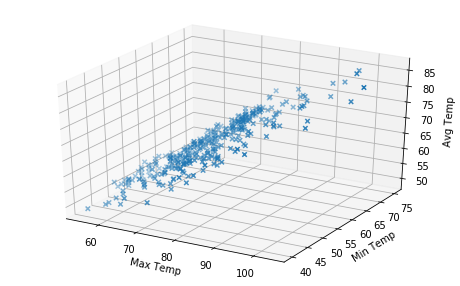

In [4]:
fig= plt.figure(1,figsize=(8,5))
ax = fig.add_subplot(111,projection='3d')
ax.scatter(TMAX,TMIN,TAVG,marker='x')
ax.set_xlabel('Max Temp')
ax.set_ylabel('Min Temp')
ax.set_zlabel('Avg Temp')
plt.show()

In [12]:
#Preprocessing the data

T = np.concatenate([TMAX,TMIN],axis=1)
scaler = MinMaxScaler()
scaler.fit(T)
T= scaler.transform(T)
 
scaler1 = MinMaxScaler()
scaler1.fit(TAVG)
TAVG = scaler1.transform(TAVG)


# divide the dataset into train and test part
X_train, X_test,Y_train, Y_test= train_test_split(T,TAVG,test_size=0.25)# it means that we will use 25% of the dataset for train, you can change it
print("Xtrain:", X_train.shape)
print("Xtest:", X_test.shape)
print("Ytrain:",Y_train.shape)
print("Ytest:", Y_test.shape)

Xtrain: (273, 2)
Xtest: (92, 2)
Ytrain: (273, 1)
Ytest: (92, 1)


Epoch 1/1000
 - 0s - loss: 0.0338 - mean_absolute_error: 0.1510
Epoch 2/1000
 - 0s - loss: 0.0313 - mean_absolute_error: 0.1454
Epoch 3/1000
 - 0s - loss: 0.0295 - mean_absolute_error: 0.1411
Epoch 4/1000
 - 0s - loss: 0.0276 - mean_absolute_error: 0.1365
Epoch 5/1000
 - 0s - loss: 0.0258 - mean_absolute_error: 0.1323
Epoch 6/1000
 - 0s - loss: 0.0237 - mean_absolute_error: 0.1270
Epoch 7/1000
 - 0s - loss: 0.0217 - mean_absolute_error: 0.1211
Epoch 8/1000
 - 0s - loss: 0.0198 - mean_absolute_error: 0.1154
Epoch 9/1000
 - 0s - loss: 0.0176 - mean_absolute_error: 0.1087
Epoch 10/1000
 - 0s - loss: 0.0156 - mean_absolute_error: 0.1022
Epoch 11/1000
 - 0s - loss: 0.0135 - mean_absolute_error: 0.0944
Epoch 12/1000
 - 0s - loss: 0.0115 - mean_absolute_error: 0.0867
Epoch 13/1000
 - 0s - loss: 0.0094 - mean_absolute_error: 0.0774
Epoch 14/1000
 - 0s - loss: 0.0076 - mean_absolute_error: 0.0688
Epoch 15/1000
 - 0s - loss: 0.0060 - mean_absolute_error: 0.0600
Epoch 16/1000
 - 0s - loss: 0.0045

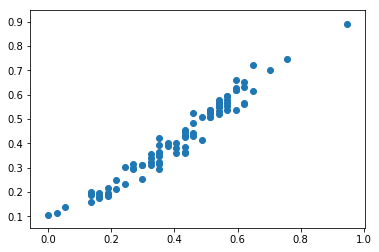

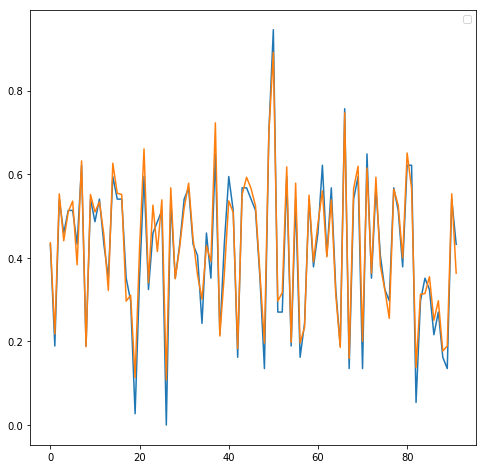

In [15]:
model = Sequential()
model.add(Dense(32,activation = 'relu', input_dim = 2))
model.add(Dense(32,activation = 'relu'))
model.add(Dense(1,activation = 'sigmoid',))
model.compile(loss ='mean_squared_error' , optimizer = 'rmsprop', metrics = [metrics.mae] )
model.fit (X_train,Y_train,epochs=1000,batch_size =32,verbose=2)
 
predict = model.predict(X_test,verbose = 1)
 
plt.figure(2)
plt.scatter(Y_test,predict)
plt.show(block =False)
 
plt.figure(3, figsize=(8,8))
Test= plt.plot(Y_test)
Predict = plt.plot(predict)
plt.legend([Predict,Test],["Predicted Data","Real Data"])
plt.show()